Idea of projects with this dataset:

Predicting the missing values with a linear regression or a KNN imputer
Comparing classification such as logistic regression or KNN with an unsupervised model such as K-Means to predict the authenticity of the bills
Trying to do a PCA or a Kernel Transform to create a clearer separation between the Genuine and Fake Bills

In [6]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline 
warnings.filterwarnings('ignore')
#sns.set_style('whitegrid')



In [70]:
from sklearn.model_selection import RandomizedSearchCV 


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.impute import SimpleImputer


In [14]:
df = pd.read_csv('fake_bills.csv', sep = ';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [15]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [17]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

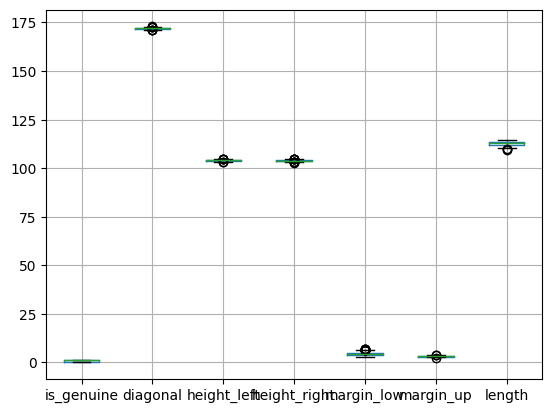

In [16]:
df.boxplot()
plt.show()

This show that we need to scale our data

In [18]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

There are missing values in our data. These values account for less than 5% in our data so we can drop them, or we can still impute them. I will go with the later.


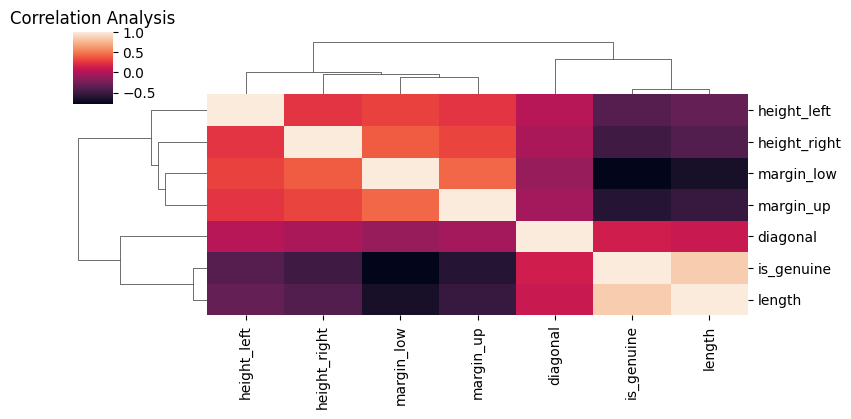

In [24]:
sns.clustermap(df.corr(), figsize=(8,4))
plt.title('Correlation Analysis')
plt.show()

Lets start modelling. I will compare between KNN and Logistic regression to see tha model that I will proceed with.

In [25]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [28]:
x = df.drop('is_genuine', axis=1).values  # Drop 'is_genuine' column and get values
y = df['is_genuine'].values


In [30]:
print(x.shape)
print(y.shape)

(1500, 6)
(1500,)


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [52]:
imputer = SimpleImputer()
scaler = StandardScaler()

In [53]:
x_train_t =imputer.fit_transform(x_train) 
x_test_t = imputer.transform(x_test) 

In [54]:
x_train_s =scaler.fit_transform(x_train_t) 
x_test_s = scaler.transform(x_test_t) 

In [55]:
models = {'knn': KNeighborsClassifier(), 'logreg': LogisticRegression()}

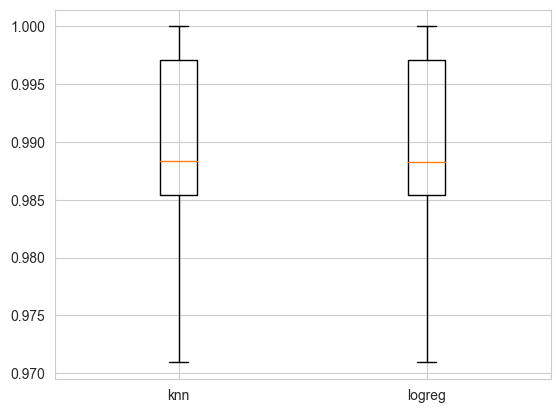

In [56]:
results = []
for model in  models.values():
    kf = KFold(n_splits=7, random_state = 24, shuffle = True)
    cv_results = cross_val_score(model, x_train_s, y_train, cv = kf)
    results.append(cv_results)
sns.set_style('whitegrid')
plt.boxplot(results, labels = models.keys())
plt.show()    

In [64]:
for name, model in models.items():
    model.fit(x_train_s, y_train)
    test_score = model.score(x_test_s, y_test)
    y_pred = model.predict(x_test_s)
    print('{} Test set accuracy: {}'.format(name, test_score))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

knn Test set accuracy: 0.9933333333333333
[[100   2]
 [  0 198]]
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       102
        True       0.99      1.00      0.99       198

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

logreg Test set accuracy: 0.99
[[100   2]
 [  1 197]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       102
        True       0.99      0.99      0.99       198

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



KNN seem to have a higher accuracy score than logistic regression.

##### Hyperparameter Tuning

In [ ]:
knn = KNeigborsClassifier()

In [72]:
    kf = KFold(n_splits=7, random_state = 24, shuffle = True)


In [73]:
params = {'n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(knn, param_grid = params, cv=kf)
cv.fit(x_train_s, y_train)
y_pred = cv.predict(x_test_s)
print(cv.best_params_, cv.best_score_)

{'n_neighbors': 10} 0.9900089370713605


In [77]:
param_distributions = {'n_neighbors': np.arange(1, 50)}
cv = RandomizedSearchCV(knn, param_distributions, cv=kf)
cv.fit(x_train_s, y_train)
y_pred = cv.predict(x_test_s)
print(cv.best_params_, cv.best_score_)

{'n_neighbors': 10} 0.9900089370713605


The two optimization methods seems to agree that n_neighbors = 10 will give a higher score of 0.99. But remember GridSearchCV is slower than RandomizedSearchCV.